In [11]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [12]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [13]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [14]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [15]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [16]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [20]:
# Save references to each table
Measr = Base.classes.measurement
Station = Base.classes.station

In [17]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [21]:
#inspect table columns
inspector = inspect(engine)
print('measurement')
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

measurement
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [22]:
# Find the most recent date in the data set.
recent = session.query(Measr.date).order_by(Measr.date.desc()).first()
recent

('2017-08-23',)

In [23]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year = dt.date(2017,8,23) - dt.timedelta(days=365)

print(year)

2016-08-23


In [24]:
# Perform a query to retrieve the data and precipitation scores
sel = [Measr.date,
      Measr.prcp,
      ]

prev_year = session.query(*sel).\
    filter(Measr.date >= year).\
    order_by(Measr.date).all()

In [25]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names

df = pd.DataFrame(prev_year)

df['date'] = df['date'].astype('datetime64[ns]')

precp_df = df.rename(columns={"date":"date", "prcp": "precipitation"})

precp_df


,date,precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


In [26]:
# Sort the dataframe by date
sorted_df = precp_df.sort_values("date")

# dataframe info
sorted_df.info()
sorted_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2230 entries, 0 to 2229
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           2230 non-null   datetime64[ns]
 1   precipitation  2021 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 52.3 KB


,date,precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2228,2017-08-23,0.08
2226,2017-08-23,0.00
2227,2017-08-23,0.00


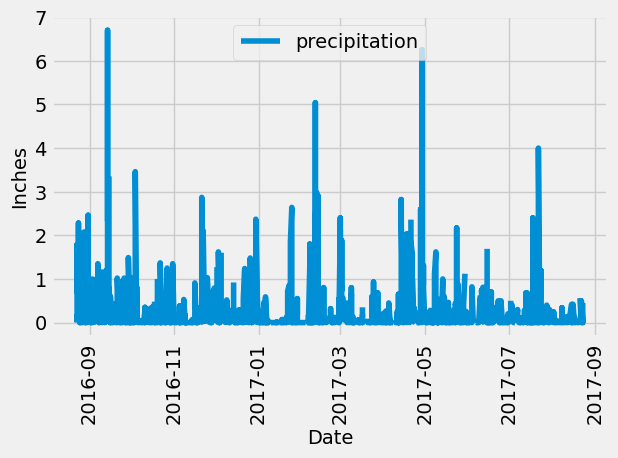

In [27]:
# Use Pandas Plotting with Matplotlib to plot the data
x = sorted_df['date']
y = sorted_df['precipitation']


plt.plot(x, y,label = 'precipitation')
plt.ylabel('Inches')
plt.xlabel('Date')
plt.xticks(rotation='vertical')
plt.legend(loc=9)
plt.tight_layout()
plt.show()


In [28]:
# Use Pandas to calculate the summary statistics for the precipitation data
sorted_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [29]:
# inspect station table
print('station')
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])

station
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [30]:
# review table contents
engine.execute('SELECT * FROM Station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [31]:
# Design a query to calculate the total number of stations in the dataset
st_count = session.query(func.count(Station.station)).all()
st_count

[(9,)]

In [32]:
#Design a query to find the most-active stations (that is, the stations that have the most rows).

activity = session.query(Measr.station, func.count(Measr.station)). \
                         group_by(Measr.station).order_by(func.count(Measr.station).desc()).all()
activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [33]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(Measr.tobs), func.max(Measr.tobs), func.avg(Measr.tobs)]

st_active = session.query(*sel). \
    filter(Measr.station == "USC00519281").all()

st_active

[(54.0, 85.0, 71.66378066378067)]

In [34]:
seltobs = [Measr.date,
           Measr.tobs,
           ]

most_active = session.query(*seltobs).\
    filter(Measr.date >= year). \
    filter(Measr.station == 'USC00519281').\
    order_by(Measr.date).all()

active_df = pd.DataFrame(most_active)
active_df

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
...,...,...
347,2017-08-14,77.0
348,2017-08-15,77.0
349,2017-08-16,76.0
350,2017-08-17,76.0


Text(0.5, 0, 'Temperature')

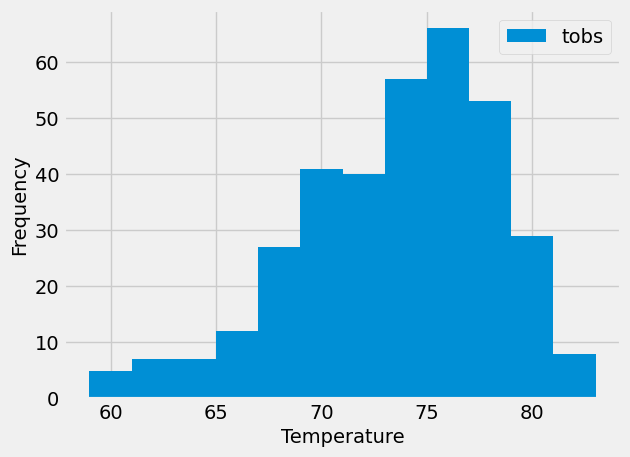

In [35]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_df.plot(kind='hist', bins=12)
plt.xlabel('Temperature')

# Close Session

In [ ]:
# Close Session
session.close()